In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score,recall_score,f1_score

sns.set()

df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [ ]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

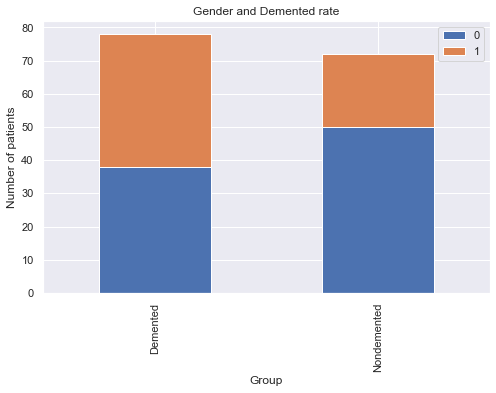

In [ ]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.3, 30.0)

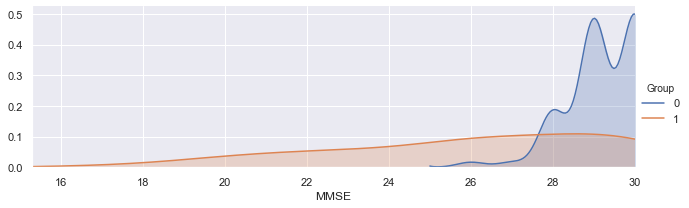

In [ ]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.6, 0.9)

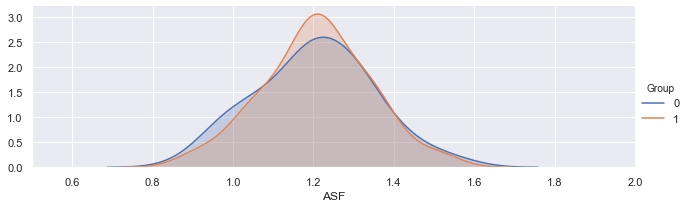

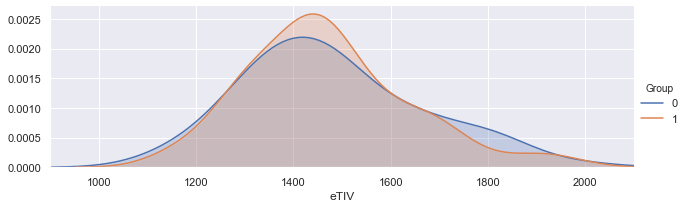

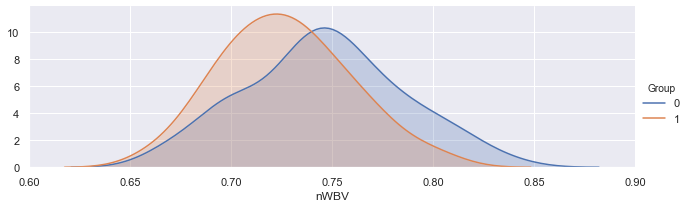

In [ ]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(50, 100)

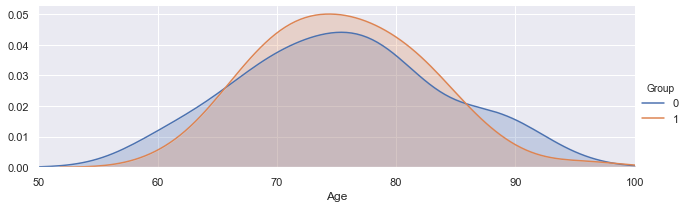

In [ ]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

(0, 0.16)

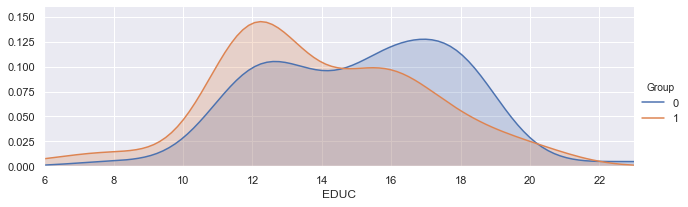

In [ ]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

In [ ]:
# Check missing values by each column
pd.isnull(df).sum() 
# The column, SES has 8 missing values

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

##  Removing rows with missing values

In [ ]:
# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

##  Imputation


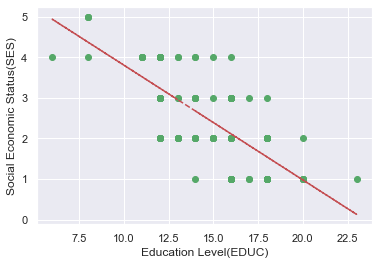

In [ ]:
# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

In [ ]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [ ]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [ ]:
# I confirm there're no more missing values and all the 150 data were used.
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

##  Splitting Train/Validation/Test Sets

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [ ]:
# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test_scaled.shape)

(38, 8)


In [ ]:
# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

##  Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix

In [ ]:
acc = [] # list to store all performance metric

In [ ]:
# Dataset with imputation
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy') # Get recall for each parameter setting
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
test_precision=precision_score(Y_test, PredictedOutput)
test_f1= f1_score(Y_test, PredictedOutput)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
print("Precision Score:",test_precision)
print("F1 Score:",test_f1)
m = 'Logistic Regression (w/ imputation)'

acc.append([m, test_score,test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

C:\Users\MADHUMITHA V\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MADHUMITHA V\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Best accuracy on validation set is: 0.724901185770751
Best parameter for regularization (C) is:  100
Test accuracy with best C parameter is 0.7894736842105263
Test recall with the best C parameter is 0.7
Test AUC with the best C parameter is 0.7944444444444444
Precision Score: 0.875
F1 Score: 0.7777777777777777


C:\Users\MADHUMITHA V\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\MADHUMITHA V\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

In [ ]:
labels = ['Demented','Non-demented']

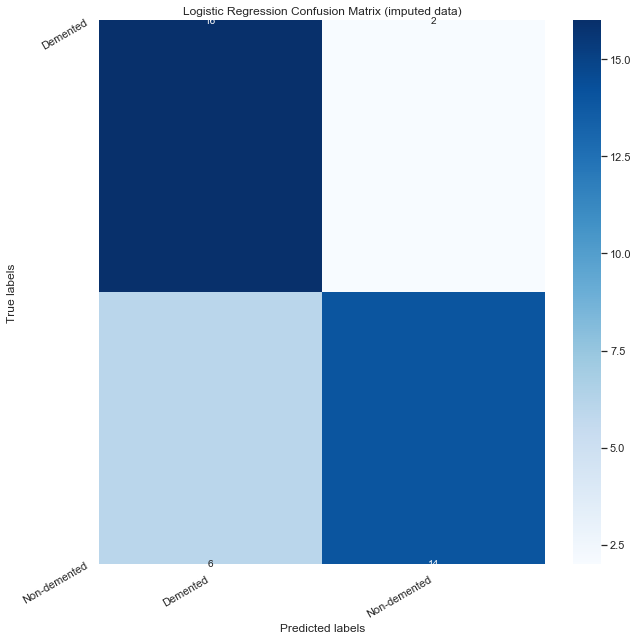

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, PredictedOutput)

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression Confusion Matrix (imputed data)'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [ ]:
# Dataset after dropping missing value rows
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedLogRegModel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)        
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

test_precision=precision_score(Y_test, PredictedOutput)
test_f1= f1_score(Y_test, PredictedOutput)

print("Precision Score:",test_precision)
print("F1 Score:",test_f1)
m = 'Logistic Regression (w/ dropna)'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.725974025974026
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8055555555555556
Test recall with the best C parameter is 0.75
Test AUC with the best C parameter is 0.8194444444444443
Precision Score: 0.8823529411764706
F1 Score: 0.8108108108108107


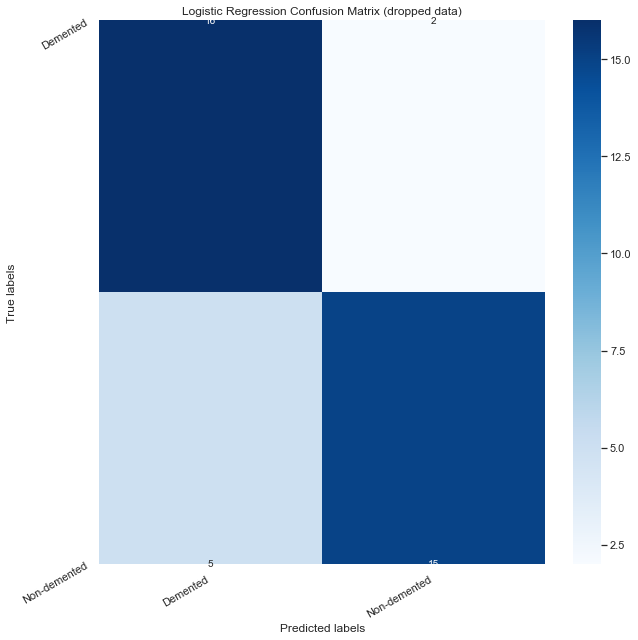

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, PredictedOutput)

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Logistic Regression Confusion Matrix (dropped data)'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In overall, dataset with imputation outperforms the one without imputation. For the later models, we use dataset without imputation.

##  SVM


In [ ]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)
test_precision=precision_score(Y_test, PredictedOutput)
test_f1= f1_score(Y_test, PredictedOutput)
print("Precision Score:",test_precision)
print("F1 Score:",test_f1)
m = 'SVM'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.7687747035573123
Best parameter for c is:  100
Best parameter for gamma is:  0.1
Best parameter for kernel is:  rbf
Test accuracy with the best parameters is 0.8157894736842105
Test recall with the best parameters is 0.7
Test recall with the best parameter is 0.8222222222222222
Precision Score: 0.9333333333333333
F1 Score: 0.8


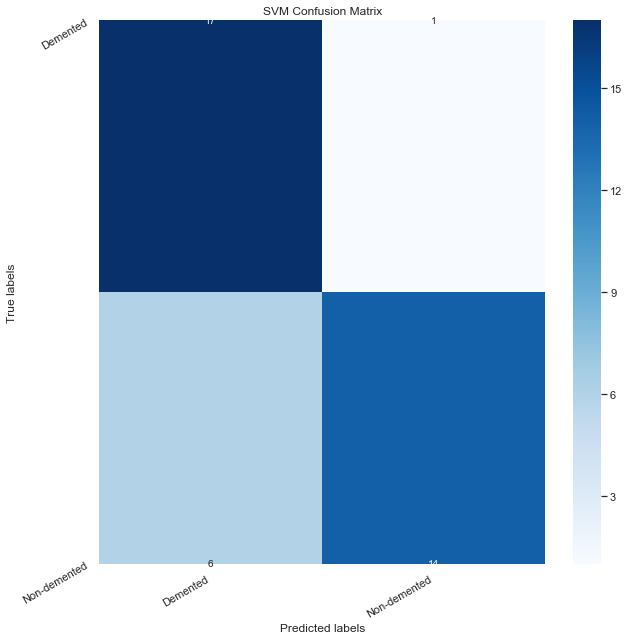

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, PredictedOutput)

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('SVM Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

##  Decision Tree

In [ ]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

test_precision=precision_score(Y_test, PredictedOutput)
test_f1= f1_score(Y_test, PredictedOutput)

print("Precision Score:",test_precision)
print("F1 Score:",test_f1)

m='Decision Tree'
acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])



Best accuracy on validation set is: 0.7770750988142293
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.8157894736842105
Test recall with best parameters is  0.65
Test AUC with the best parameter is  0.825
Precision Score: 1.0
F1 Score: 0.787878787878788


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U4')

In [ ]:
# from sklearn.tree import export_graphviz
# import graphviz 

# dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
# graph = graphviz.Source(dot_data)  
# graph 

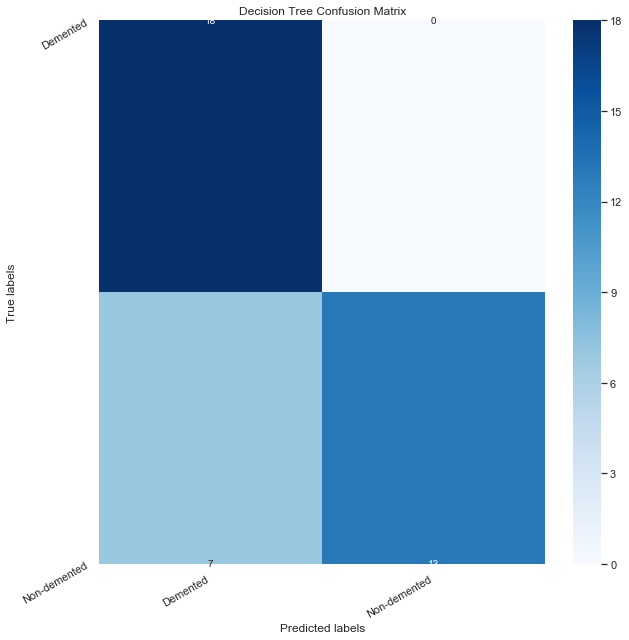

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, PredictedOutput)

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Decision Tree Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

## Random Forest Classifier


In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)


test_precision=precision_score(Y_test, PredictedOutput)
test_f1= f1_score(Y_test, PredictedOutput)

print("Precision Score:",test_precision)
print("F1 Score:",test_f1)
m = 'Random Forest'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8035573122529645
Best parameters of M, d, m are:  2 5 7
Test accuracy with the best parameters is 0.868421052631579
Test recall with the best parameters is: 0.8
Test AUC with the best parameters is: 0.8722222222222222
Precision Score: 0.9411764705882353
F1 Score: 0.8648648648648648


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.03503132427481025'],
       ['Age', '0.09551237125526228'],
       ['EDUC', '0.06261556797214127'],
       ['SES', '0.060620327518549066'],
       ['MMSE', '0.4006565962793097'],
       ['eTIV', '0.07005497528287095'],
       ['nWBV', '0.1460571117936201'],
       ['ASF', '0.1294517256234364']], dtype='<U20')

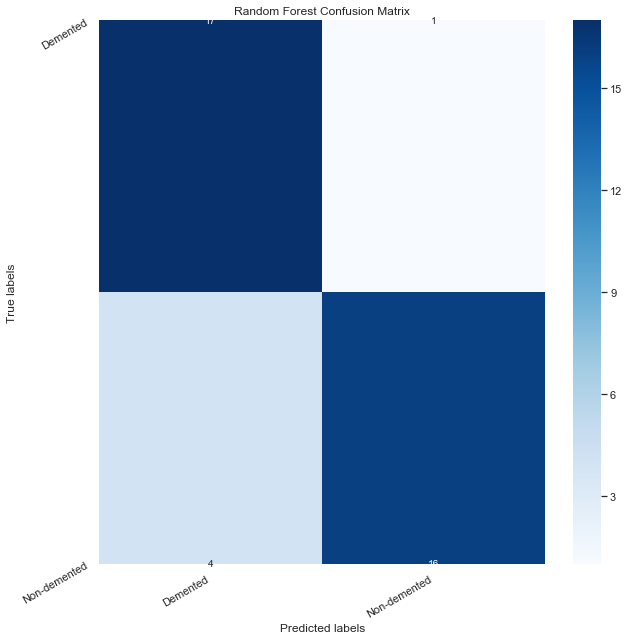

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, PredictedOutput)

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

##  AdaBoost

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set        
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)


test_precision=precision_score(Y_test, PredictedOutput)
test_f1= f1_score(Y_test, PredictedOutput)

print("Precision Score:",test_precision)
print("F1 Score:",test_f1)
m = 'AdaBoost'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7770750988142293
Best parameter of M is:  2
best parameter of LR is:  0.0001
Test accuracy with the best parameter is 0.868421052631579
Test recall with the best parameters is: 0.65
Test AUC with the best parameters is: 0.825
Precision Score: 1.0
F1 Score: 0.787878787878788


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.21428571428571427'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.14285714285714285'],
       ['ASF', '0.0']], dtype='<U19')

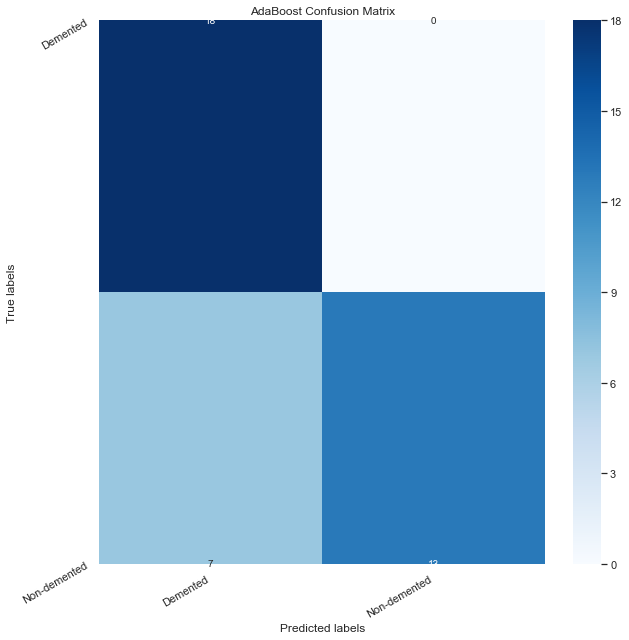

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, PredictedOutput)

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('AdaBoost Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

# Averaging Method


*   LinearRegression
*   XGBRegression
*   RandomForestRegressor









In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 
# training all the model on the training dataset
model_1.fit(X_trainval_scaled, Y_trainval)
model_2.fit(X_trainval_scaled, Y_trainval)
model_3.fit(X_trainval_scaled, Y_trainval)

# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test_scaled)
pred_2 = model_2.predict(X_test_scaled)
pred_3 = model_3.predict(X_test_scaled)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(Y_test, pred_final))

test_score = accuracy_score(Y_test, pred_final.round())

test_recall = recall_score(Y_test, pred_final.round())
fpr, tpr, thresholds = roc_curve(Y_test, pred_final, pos_label=1)
test_auc = auc(fpr, tpr)
test_precision=precision_score(Y_test, pred_final.round())
test_f1= f1_score(Y_test, pred_final.round())
print("Accuracy=",accuracy_score(Y_test, pred_final.round()))
print("Precision=",precision_score(Y_test, pred_final.round()))
print("Recall=",recall_score(Y_test, pred_final.round()))

print("Precision Score:",test_precision)
print("F1 Score:",test_f1)
m = 'Ensemble Learning Averaging Results'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

0.15369790473213452
Accuracy= 0.7894736842105263
Precision= 0.9285714285714286
Recall= 0.65
Precision Score: 0.9285714285714286
F1 Score: 0.7647058823529412


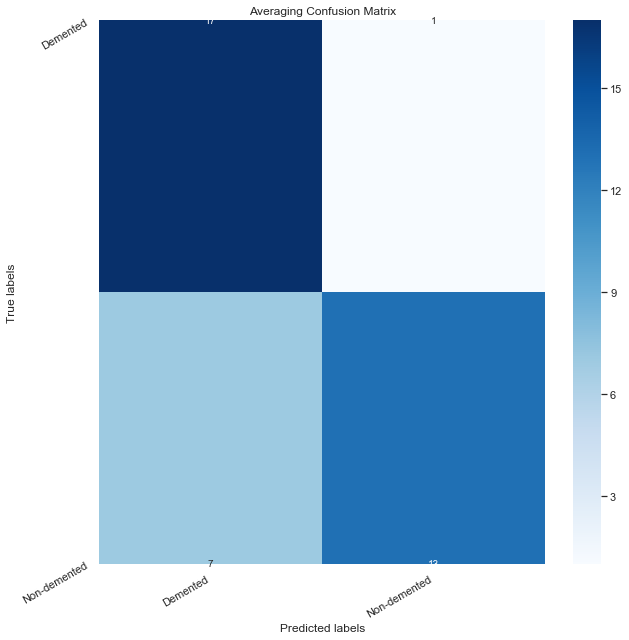

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_final.round())

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Averaging Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

# MaxVoting
Using new models
*   LinearRegression
*   XGBRegression
*   RandomForestRegressor

In [ ]:
from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
# importing voting classifier
from sklearn.ensemble import VotingClassifier


model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()
 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_trainval_scaled, Y_trainval)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test_scaled)
 
# printing log loss between actual and predicted value
print(log_loss( Y_test, pred_final))

test_score = accuracy_score(Y_test, pred_final)
test_recall = recall_score(Y_test, pred_final)
fpr, tpr, thresholds = roc_curve(Y_test, pred_final, pos_label=1)
test_auc = auc(fpr, tpr)
test_precision=precision_score(Y_test, pred_final)
test_f1= f1_score(Y_test, pred_final)
print("Accuracy=",accuracy_score(Y_test, pred_final))
print("Precision=",precision_score(Y_test, pred_final))
print("Recall=",recall_score(Y_test, pred_final))
print("F1 score=",f1_score(Y_test, pred_final))
print("AUC =", test_auc)

m = 'Ensemble Learning Max Voting'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

4.544575841435617
Accuracy= 0.868421052631579
Precision= 1.0
Recall= 0.75
F1 score= 0.8571428571428571
AUC = 0.875


# Max Voting
Using our previously trained models

In [ ]:


from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
 
# importing voting classifier
from sklearn.ensemble import VotingClassifier


model_1 = SelectedLogRegModel
model_2 = SelectedSVMmodel
model_3 = SelectedDTModel

 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_trainval_scaled, Y_trainval)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test_scaled)
 
# printing log loss between actual and predicted value
print(log_loss( Y_test, pred_final))

test_score = accuracy_score(Y_test, pred_final)
test_recall = recall_score(Y_test, pred_final)
fpr, tpr, thresholds = roc_curve(Y_test, pred_final, pos_label=1)
test_auc = auc(fpr, tpr)
test_precision=precision_score(Y_test, pred_final)
test_f1= f1_score(Y_test, pred_final)
print("Accuracy=",accuracy_score(Y_test, pred_final))
print("Precision=",precision_score(Y_test, pred_final))
print("Recall=",recall_score(Y_test, pred_final))
print("F1 score=",f1_score(Y_test, pred_final))
print("AUC =", test_auc)

m = 'Ensemble Learning Max Voting'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

5.45349100972274
Accuracy= 0.8421052631578947
Precision= 1.0
Recall= 0.7
F1 score= 0.8235294117647058
AUC = 0.85


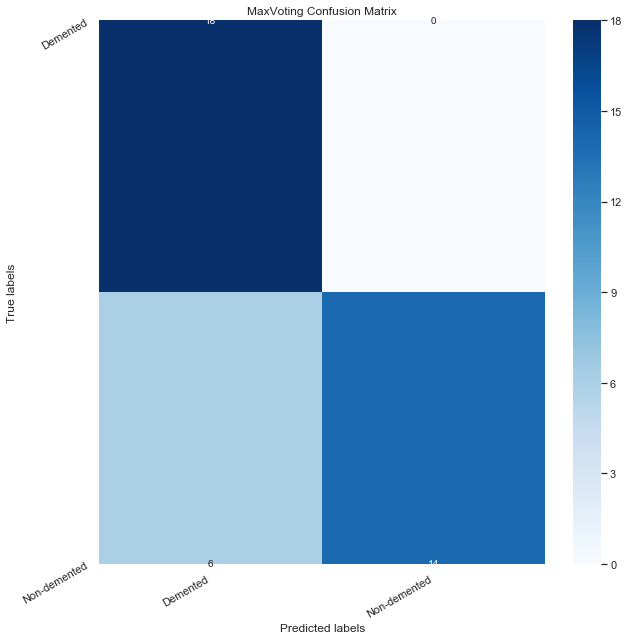

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_final)

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('MaxVoting Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

# Bagging

In [ ]:
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
import xgboost as xgb
 
# importing bagging module
from sklearn.ensemble import BaggingRegressor


model = BaggingRegressor(base_estimator=xgb.XGBRegressor())
 
# training model
model.fit(X_trainval_scaled,Y_trainval)
 
# predicting the output on the test dataset
pred = model.predict(X_test_scaled)
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(Y_test, pred_final.round()))
test_score = accuracy_score(Y_test, pred_final.round())
test_recall = recall_score(Y_test, pred_final.round())
fpr, tpr, thresholds = roc_curve(Y_test, pred_final, pos_label=1)
test_auc = auc(fpr, tpr)
test_precision=precision_score(Y_test, pred_final.round())
test_f1= f1_score(Y_test, pred_final.round())
print("Accuracy=",accuracy_score(Y_test, pred_final.round()))
print("Precision=",precision_score(Y_test, pred_final.round()))
print("Recall=",recall_score(Y_test, pred_final.round()))
print("F1 score=",f1_score(Y_test, pred_final.round()))
print("AUC =", test_auc)

m = 'Ensemble Learning Bagging'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

0.15789473684210525
Accuracy= 0.8421052631578947
Precision= 1.0
Recall= 0.7
F1 score= 0.8235294117647058
AUC = 0.85


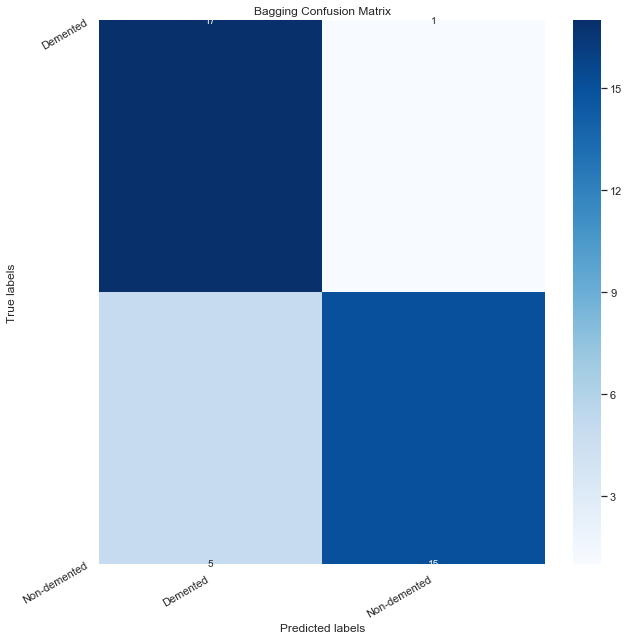

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred.round())

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Bagging Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

# **Boosting**

In [ ]:
from sklearn.metrics import mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import GradientBoostingRegressor



model = GradientBoostingRegressor()
 
# training the model on the train dataset
model.fit(X_trainval_scaled,Y_trainval)
 
# predicting the output on the test dataset
pred_final = model.predict(X_test_scaled)
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(Y_test, pred_final))

test_score = accuracy_score(Y_test, pred_final.round())
test_recall = recall_score(Y_test, pred_final.round())
fpr, tpr, thresholds = roc_curve(Y_test, pred_final, pos_label=1)
test_auc = auc(fpr, tpr)
test_precision=precision_score(Y_test, pred_final.round())
test_f1= f1_score(Y_test, pred_final.round())
print("Accuracy=",accuracy_score(Y_test, pred_final.round()))
print("Precision=",precision_score(Y_test, pred_final.round()))
print("Recall=",recall_score(Y_test, pred_final.round()))
print("F1 score=",f1_score(Y_test, pred_final.round()))
print("AUC =", test_auc)

m = 'Ensemble Learning Boosting'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

0.16104881277837077
Accuracy= 0.7631578947368421
Precision= 0.8666666666666667
Recall= 0.65
F1 score= 0.7428571428571429
AUC = 0.8444444444444444


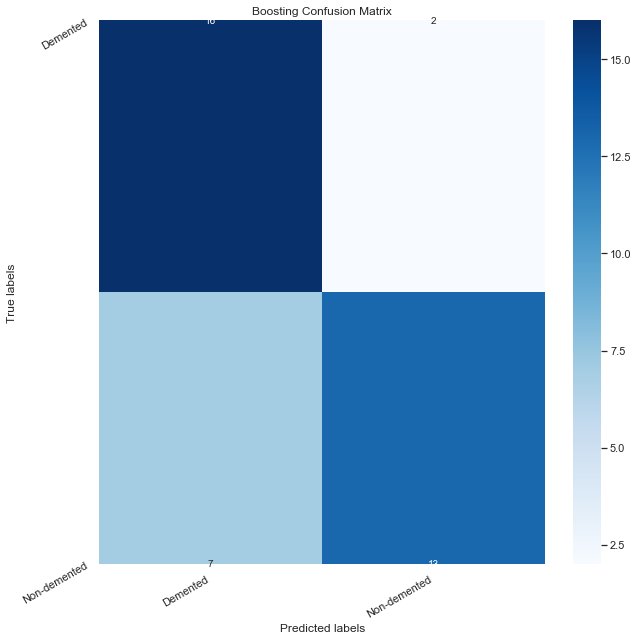

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_final.round())

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Boosting Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

# Averaging Method
Using our previously trained models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# initializing all the model objects with default parameters
model_1 = SelectedLogRegModel
model_2 = SelectedSVMmodel
model_3 = SelectedDTModel
 
 
# predicting the output on the validation dataset
pred_1 = model_1.predict(X_test_scaled)
pred_2 = model_2.predict(X_test_scaled)
pred_3 = model_3.predict(X_test_scaled)
 
# final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0
 
# printing the root mean squared error between real value and predicted value
print(mean_squared_error(Y_test, pred_final))



test_score = accuracy_score(Y_test, pred_final.round())
test_recall = recall_score(Y_test, pred_final.round())
fpr, tpr, thresholds = roc_curve(Y_test, pred_final, pos_label=1)
test_auc = auc(fpr, tpr)
test_precision=precision_score(Y_test, pred_final.round())
test_f1= f1_score(Y_test, pred_final.round())
print("Accuracy=",accuracy_score(Y_test, pred_final.round()))
print("Precision=",precision_score(Y_test, pred_final.round()))
print("Recall=",recall_score(Y_test, pred_final.round()))
print("F1 score=",f1_score(Y_test, pred_final.round()))
print("AUC =", test_auc)

m = 'Ensemble learning Averaging Results'

acc.append([m, test_score, test_precision, test_recall, test_f1,test_auc, fpr, tpr, thresholds])

0.15497076023391815
Accuracy= 0.8421052631578947
Precision= 1.0
Recall= 0.7
F1 score= 0.8235294117647058
AUC = 0.8500000000000001


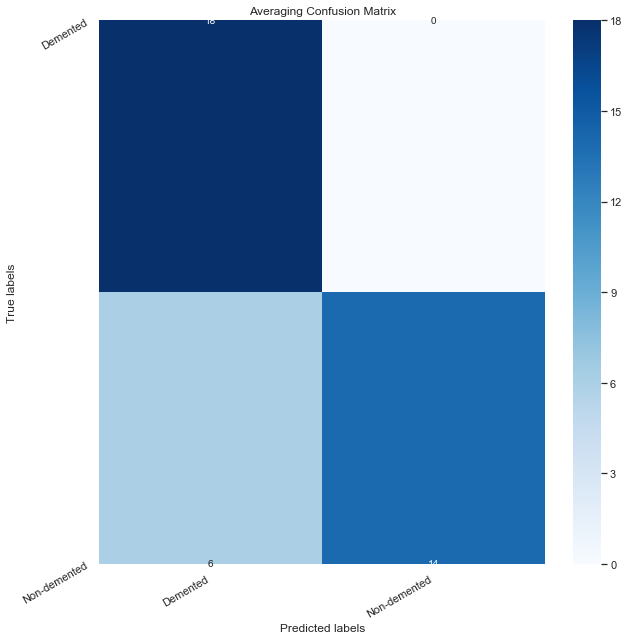

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_final.round())

fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Blues",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Averaging Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

# Results

In [ ]:
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Presision','Recall','F1 Score', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'F1 Score','AUC']]

,Model,Accuracy,Recall,F1 Score,AUC
0,Logistic Regression (w/ imputation),0.789474,0.70,0.777778,0.794444
1,Logistic Regression (w/ dropna),0.805556,0.75,0.810811,0.819444
2,SVM,0.815789,0.70,0.800000,0.822222
3,Decision Tree,0.815789,0.65,0.787879,0.825000
4,Random Forest,0.868421,0.80,0.864865,0.872222
5,AdaBoost,0.868421,0.65,0.787879,0.825000
6,Ensemble Learning Averaging Results,0.789474,0.65,0.764706,0.833333
7,Ensemble Learning Max Voting,0.868421,0.75,0.857143,0.875000
8,Ensemble Learning Max Voting,0.842105,0.70,0.823529,0.850000
9,Ensemble Learning Bagging,0.842105,0.70,0.823529,0.850000


In [ ]:
print("w")

w


In [ ]:
PredictedOutput = SelectedRFModel.predict(X_test_scaled)

In [ ]:
X_test_scaled[1]

array([0.        , 0.16666667, 0.70588235, 0.25      , 1.        ,
       0.44097222, 0.40880503, 0.41764706])

# Prediction using Random Forest

In [ ]:
 def pred(data):
    data_test = pd.DataFrame(data)  #M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
    # data_test = np.reshape(1,1)
    test = scaler.transform(data_test)
    PredictedOutput = SelectedRFModel.predict(test)
    return PredictedOutput

def class_pred(x):
    if x[0] == 1:
        return "Demented"
    else:
        return "Non Demented"

In [ ]:
PredictedOutput=pred([[1,78,12,4.0,21.0,1477,0.672,1.188]])
class_pred(PredictedOutput)

'Demented'

In [ ]:

import pickle
 
filename = 'finalized_model.sav'
pickle.dump(SelectedRFModel, open(filename, 'wb'))

with open('scaler.pkl', 'wb') as file:   
    # A new file will be created
    pickle.dump(scaler, file)


In [ ]:
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)